In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuración
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', 50)

# Rutas
BASE_DIR = Path().resolve().parent
DATA_PATH = BASE_DIR / 'data' / 'gold' / 'model' / 'classification_event_dataset.parquet'

In [2]:
# Cargar datos
df = pd.read_parquet(DATA_PATH)
print(f"Shape: {df.shape}")
print(f"\nColumnas ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2}. {col}")
df.head()

Shape: (343861, 63)

Columnas (63):
   1. departamento
   2. municipio
   3. edad_persona
   4. armas_medios
   5. cantidad
   6. fecha
   7. genero
   8. anio
   9. delito
  10. codigo_municipio
  11. mes
  12. dia
  13. es_dia_semana
  14. es_fin_de_semana
  15. es_fin_mes
  16. es_festivo
  17. nombre_festivo
  18. es_dia_laboral
  19. origen
  20. codigo_departamento
  21. municipio_ctx
  22. area
  23. departamento_ctx
  24. Shape_Leng
  25. Shape_Area
  26. geometry
  27. n_centros_poblados
  28. total_delitos
  29. ABIGEATO
  30. AMENAZAS
  31. DELITOS SEXUALES
  32. EXTORSION
  33. HOMICIDIOS
  34. HURTOS
  35. LESIONES
  36. VIOLENCIA INTRAFAMILIAR
  37. femenino_adolescentes
  38. femenino_adultos
  39. femenino_menores
  40. masculino_adolescentes
  41. masculino_adultos
  42. masculino_menores
  43. poblacion_total
  44. poblacion_menores
  45. poblacion_adultos
  46. poblacion_adolescentes
  47. area_km2
  48. densidad_poblacional
  49. centros_por_km2
  50. proporcion_men

,departamento,municipio,edad_persona,armas_medios,cantidad,fecha,genero,anio,delito,codigo_municipio,mes,dia,es_dia_semana,es_fin_de_semana,es_fin_mes,es_festivo,nombre_festivo,es_dia_laboral,origen,codigo_departamento,municipio_ctx,area,departamento_ctx,Shape_Leng,Shape_Area,...,femenino_menores,masculino_adolescentes,masculino_adultos,masculino_menores,poblacion_total,poblacion_menores,poblacion_adultos,poblacion_adolescentes,area_km2,densidad_poblacional,centros_por_km2,proporcion_menores,proporcion_adultos,proporcion_adolescentes,fecha_ctx,trimestre,anio_mes,es_fin_ano,n_dias_semana,n_fines_de_semana,n_festivos,n_dias_laborales,mes_sin,mes_cos,perfil
0,SANTANDER,FLORIÁN,ADULTOS,NO REPORTADO,1,2010-01-05,MASCULINO,2010,ABIGEATO,68271,1,5,1,0,0,0,None,1,SCRAPING,68,FLORIÁN,176.599655,SANTANDER,0.892371,0.014419,...,982,372,5335,1079,12682,2061,9959,662,176.599655,71.812145,0.022650,0.162514,0.785286,0.052200,2010-01-01,1,2010-01,0,2,2,1,1,0.5,0.866025,MASCULINO_ADULTOS
1,SANTANDER,PUENTE NACIONAL,ADULTOS,NO REPORTADO,1,2010-01-06,MASCULINO,2010,ABIGEATO,68572,1,6,1,0,0,0,None,1,SCRAPING,68,PUENTE NACIONAL,251.678548,SANTANDER,0.755909,0.020549,...,1722,642,10725,1833,26902,3555,22030,1317,251.678548,106.890318,0.027813,0.132146,0.818898,0.048955,2010-01-01,1,2010-01,0,13,4,0,13,0.5,0.866025,MASCULINO_ADULTOS
2,SANTANDER,PUENTE NACIONAL,ADULTOS,ARMA DE FUEGO,1,2010-01-07,MASCULINO,2010,ABIGEATO,68572,1,7,1,0,0,0,None,1,SCRAPING,68,PUENTE NACIONAL,251.678548,SANTANDER,0.755909,0.020549,...,1722,642,10725,1833,26902,3555,22030,1317,251.678548,106.890318,0.027813,0.132146,0.818898,0.048955,2010-01-01,1,2010-01,0,13,4,0,13,0.5,0.866025,MASCULINO_ADULTOS
3,SANTANDER,BARRANCABERMEJA,ADULTOS,NO REPORTADO,1,2010-01-10,MASCULINO,2010,ABIGEATO,68081,1,10,0,1,0,0,None,0,SCRAPING,68,BARRANCABERMEJA,1326.838302,SANTANDER,2.735190,0.108591,...,25413,10056,151760,26622,382996,52035,311624,19337,1326.838302,288.653108,0.005276,0.135863,0.813648,0.050489,2010-01-01,1,2010-01,0,85,53,15,70,0.5,0.866025,MASCULINO_ADULTOS
4,SANTANDER,MOGOTES,ADULTOS,NO REPORTADO,1,2010-01-17,MASCULINO,2010,ABIGEATO,68464,1,17,0,1,0,0,None,0,SCRAPING,68,MOGOTES,483.970127,SANTANDER,1.104474,0.039550,...,1622,625,8816,1711,21826,3333,17294,1199,483.970127,45.097825,0.008265,0.152708,0.792358,0.054934,2010-01-01,1,2010-01,0,4,1,1,3,0.5,0.866025,MASCULINO_ADULTOS


In [3]:
# Info general
print("=" * 60)
print("INFO GENERAL")
print("=" * 60)
print(f"\nTotal eventos: {len(df):,}")
print(f"Período: {df['anio'].min()} - {df['anio'].max()}")
print(f"Municipios: {df['codigo_municipio'].nunique()}")
print(f"\nValores nulos por columna:")
nulls = df.isnull().sum()
print(nulls[nulls > 0])

INFO GENERAL

Total eventos: 343,861
Período: 2010 - 2025
Municipios: 87

Valores nulos por columna:
nombre_festivo    327424
dtype: int64


## 1. Balance de Clases - Delito

In [4]:
# Balance de clases: delito
print("=" * 60)
print("BALANCE DE CLASES: delito")
print("=" * 60)

delito_counts = df['delito'].value_counts()
delito_pct = df['delito'].value_counts(normalize=True) * 100

balance_delito = pd.DataFrame({
    'count': delito_counts,
    'porcentaje': delito_pct.round(2)
})
print(balance_delito)

# Ratio de desbalance
ratio = delito_counts.max() / delito_counts.min()
print(f"\nRatio max/min: {ratio:.2f}")
print(f"Clase mayoritaria: {delito_counts.idxmax()} ({delito_counts.max():,})")
print(f"Clase minoritaria: {delito_counts.idxmin()} ({delito_counts.min():,})")

BALANCE DE CLASES: delito
                          count  porcentaje
delito                                     
LESIONES                 122348       35.58
HURTOS                   104201       30.30
VIOLENCIA INTRAFAMILIAR   55049       16.01
AMENAZAS                  32123        9.34
DELITOS SEXUALES          16561        4.82
HOMICIDIOS                 9340        2.72
EXTORSION                  2952        0.86
ABIGEATO                   1287        0.37

Ratio max/min: 95.06
Clase mayoritaria: LESIONES (122,348)
Clase minoritaria: ABIGEATO (1,287)


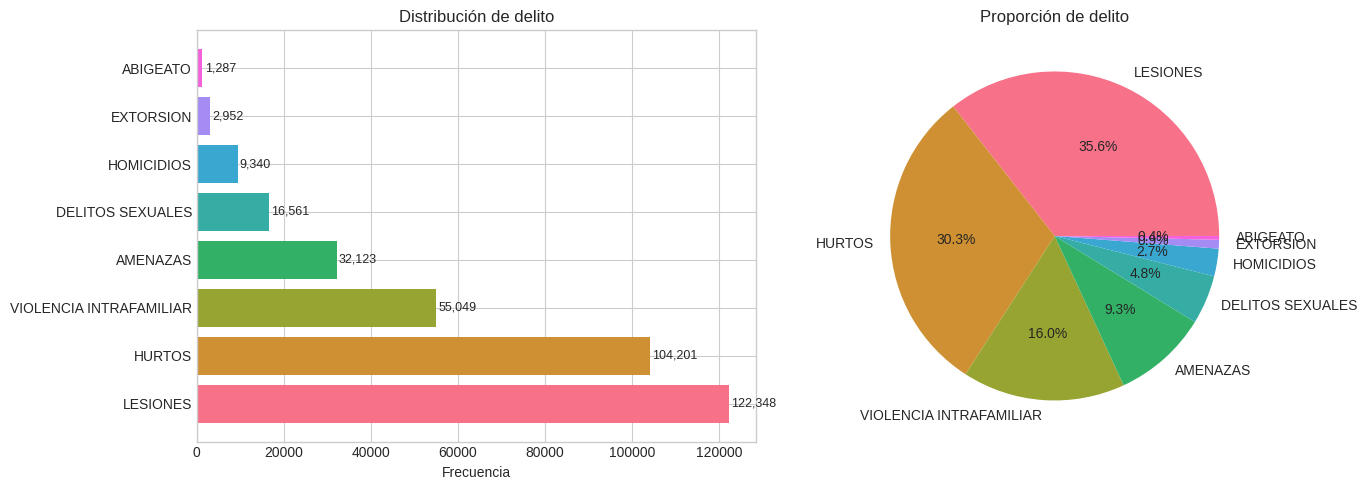

In [5]:
# Visualización balance delito
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = sns.color_palette('husl', len(delito_counts))

# Barplot
ax1 = axes[0]
bars = ax1.barh(delito_counts.index, delito_counts.values, color=colors)
ax1.set_xlabel('Frecuencia')
ax1.set_title('Distribución de delito')
for bar, val in zip(bars, delito_counts.values):
    ax1.text(val + 500, bar.get_y() + bar.get_height()/2, f'{val:,}', va='center', fontsize=9)

# Pie chart
ax2 = axes[1]
ax2.pie(delito_counts.values, labels=delito_counts.index, autopct='%1.1f%%', colors=colors)
ax2.set_title('Proporción de delito')

plt.tight_layout()
plt.show()

## 2. Balance de Clases - Armas/Medios

In [6]:
# Balance de clases: armas_medios
print("=" * 60)
print("BALANCE DE CLASES: armas_medios")
print("=" * 60)

arma_counts = df['armas_medios'].value_counts()
arma_pct = df['armas_medios'].value_counts(normalize=True) * 100

balance_arma = pd.DataFrame({
    'count': arma_counts,
    'porcentaje': arma_pct.round(2)
})
print(balance_arma.head(20))

print(f"\nTotal categorías: {len(arma_counts)}")
print(f"Clases con <1000 muestras: {(arma_counts < 1000).sum()}")
print(f"Clases con <100 muestras: {(arma_counts < 100).sum()}")

BALANCE DE CLASES: armas_medios
                              count  porcentaje
armas_medios                                   
SIN EMPLEO DE ARMAS          108771       31.63
CONTUNDENTES                  97292       28.29
ARMA BLANCA / CORTOPUNZANTE   50808       14.78
NO REPORTADO                  42574       12.38
ARMA DE FUEGO                 22572        6.56
VEHICULO                       7112        2.07
MOTO                           4304        1.25
PALANCAS                       2915        0.85
LLAMADA TELEFONICA             1556        0.45
ESCOPOLAMINA                   1103        0.32
LLAVE MAESTRA                  1076        0.31
ACIDO                           918        0.27
DIRECTA                         533        0.16
PUNZANTES                       471        0.14
REDES SOCIALES                  319        0.09
CORTANTES                       295        0.09
PERRO                           256        0.07
ARMA TRAUMATICA                 193        0.06
MIXTA   

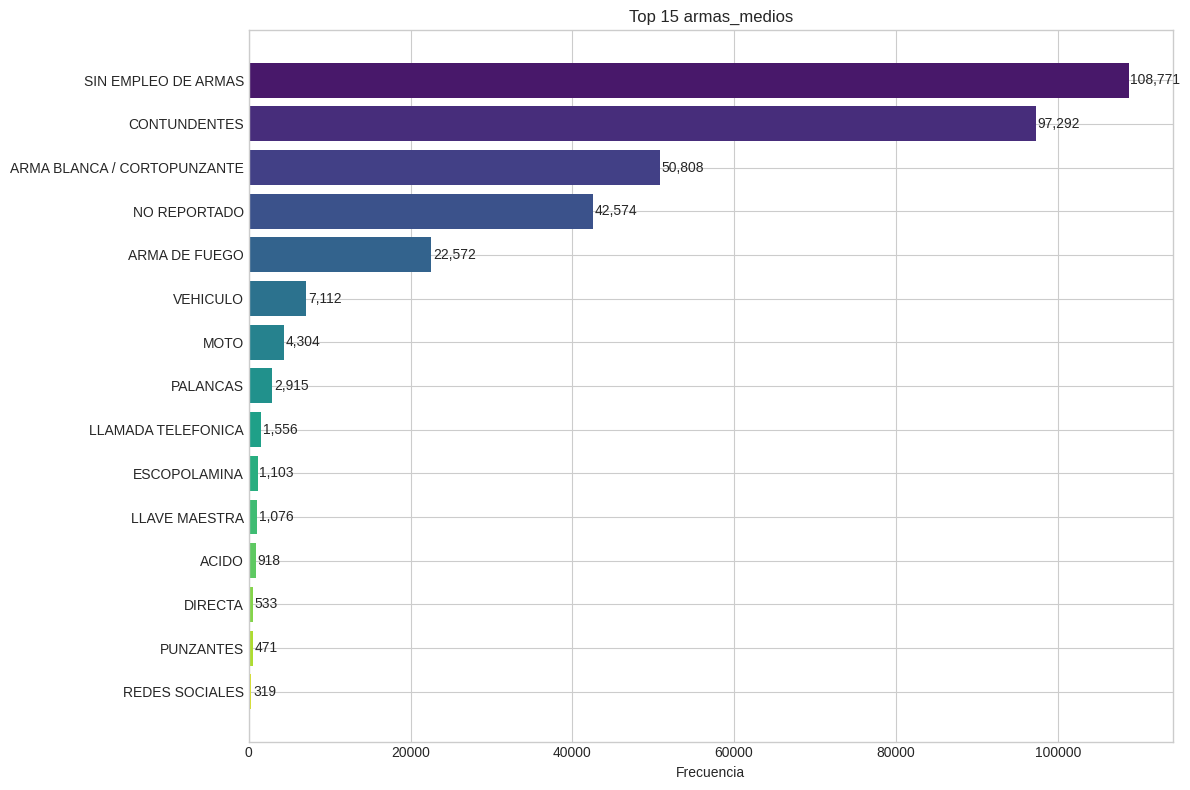

In [7]:
# Visualización top 15 armas_medios
fig, ax = plt.subplots(figsize=(12, 8))

top_armas = arma_counts.head(15)
colors = sns.color_palette('viridis', len(top_armas))
bars = ax.barh(top_armas.index, top_armas.values, color=colors)
ax.set_xlabel('Frecuencia')
ax.set_title('Top 15 armas_medios')
ax.invert_yaxis()

for bar, val in zip(bars, top_armas.values):
    ax.text(val + 200, bar.get_y() + bar.get_height()/2, f'{val:,}', va='center')

plt.tight_layout()
plt.show()

## 3. Balance de Clases - Perfil

In [8]:
# Balance de clases: perfil
print("=" * 60)
print("BALANCE DE CLASES: perfil")
print("=" * 60)

perfil_counts = df['perfil'].value_counts()
perfil_pct = df['perfil'].value_counts(normalize=True) * 100

balance_perfil = pd.DataFrame({
    'count': perfil_counts,
    'porcentaje': perfil_pct.round(2)
})
print(balance_perfil)

# Ratio de desbalance
ratio = perfil_counts.max() / perfil_counts.min()
print(f"\nRatio max/min: {ratio:.2f}")

BALANCE DE CLASES: perfil
                          count  porcentaje
perfil                                     
MASCULINO_ADULTOS        163424       47.53
FEMENINO_ADULTOS         143049       41.60
FEMENINO_ADOLESCENTES     12086        3.51
MASCULINO_ADOLESCENTES    11221        3.26
FEMENINO_MENORES           8523        2.48
MASCULINO_MENORES          5429        1.58
NO REPORTA_ADULTOS          124        0.04
NO REPORTA_MENORES            4        0.00
NO REPORTA_ADOLESCENTES       1        0.00

Ratio max/min: 163424.00


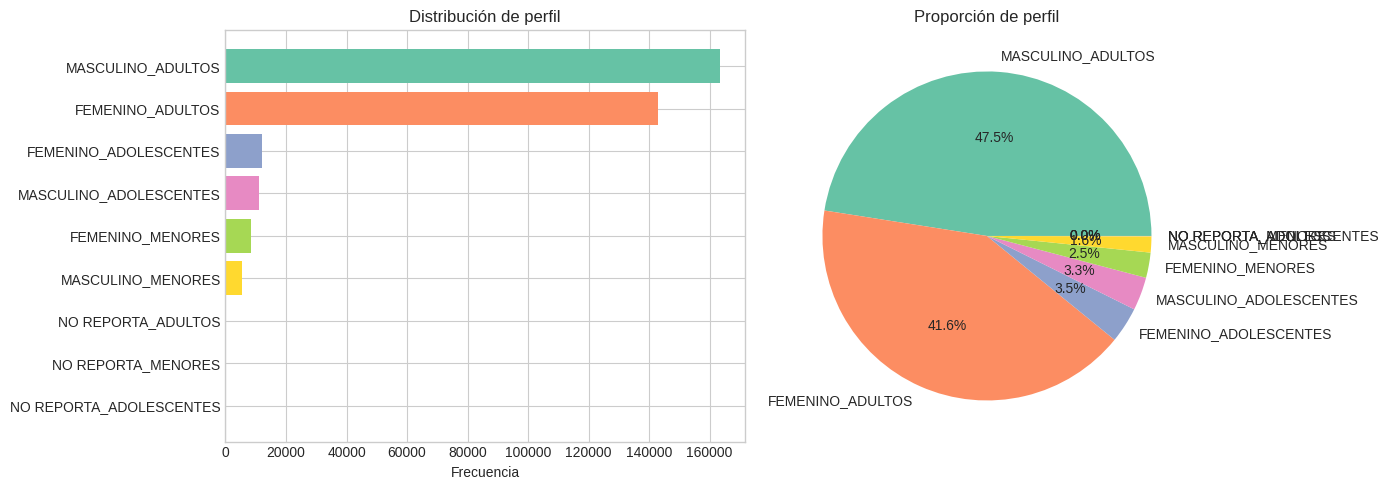

In [9]:
# Visualización perfil
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = sns.color_palette('Set2', len(perfil_counts))

# Barplot
ax1 = axes[0]
bars = ax1.barh(perfil_counts.index, perfil_counts.values, color=colors)
ax1.set_xlabel('Frecuencia')
ax1.set_title('Distribución de perfil')
ax1.invert_yaxis()

# Pie chart
ax2 = axes[1]
ax2.pie(perfil_counts.values, labels=perfil_counts.index, autopct='%1.1f%%', colors=colors)
ax2.set_title('Proporción de perfil')

plt.tight_layout()
plt.show()

## 4. Análisis de Features Numéricas

In [10]:
# Identificar columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Columnas numéricas ({len(numeric_cols)}):")
for col in numeric_cols:
    print(f"  - {col}")

# Estadísticas descriptivas
df[numeric_cols].describe()

Columnas numéricas (47):
  - cantidad
  - anio
  - codigo_municipio
  - mes
  - dia
  - es_dia_semana
  - es_fin_de_semana
  - es_fin_mes
  - es_festivo
  - es_dia_laboral
  - area
  - Shape_Leng
  - Shape_Area
  - n_centros_poblados
  - total_delitos
  - ABIGEATO
  - AMENAZAS
  - DELITOS SEXUALES
  - EXTORSION
  - HOMICIDIOS
  - HURTOS
  - LESIONES
  - VIOLENCIA INTRAFAMILIAR
  - femenino_adolescentes
  - femenino_adultos
  - femenino_menores
  - masculino_adolescentes
  - masculino_adultos
  - masculino_menores
  - poblacion_total
  - poblacion_menores
  - poblacion_adultos
  - poblacion_adolescentes
  - area_km2
  - densidad_poblacional
  - centros_por_km2
  - proporcion_menores
  - proporcion_adultos
  - proporcion_adolescentes
  - trimestre
  - es_fin_ano
  - n_dias_semana
  - n_fines_de_semana
  - n_festivos
  - n_dias_laborales
  - mes_sin
  - mes_cos


,cantidad,anio,codigo_municipio,mes,dia,es_dia_semana,es_fin_de_semana,es_fin_mes,es_festivo,es_dia_laboral,area,Shape_Leng,Shape_Area,n_centros_poblados,total_delitos,ABIGEATO,AMENAZAS,DELITOS SEXUALES,EXTORSION,HOMICIDIOS,HURTOS,LESIONES,VIOLENCIA INTRAFAMILIAR,femenino_adolescentes,femenino_adultos,femenino_menores,masculino_adolescentes,masculino_adultos,masculino_menores,poblacion_total,poblacion_menores,poblacion_adultos,poblacion_adolescentes,area_km2,densidad_poblacional,centros_por_km2,proporcion_menores,proporcion_adultos,proporcion_adolescentes,trimestre,es_fin_ano,n_dias_semana,n_fines_de_semana,n_festivos,n_dias_laborales,mes_sin,mes_cos
count,343861.000000,343861.000000,343861.000000,343861.000000,343861.0,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.00000,343861.000000,343861.000000,343861.000000,3.438610e+05,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.00000,343861.000000,3.438610e+05,3.438610e+05
mean,1.340475,2018.368440,68242.420033,6.341085,15.474285,0.674973,0.325027,0.032153,0.047801,0.633928,492.994942,1.302363,0.040338,4.479176,473.160143,0.329770,32.312810,18.120517,2.980873,7.767999,189.753790,138.474500,83.419885,10692.040839,156778.046615,28111.56257,11028.149741,140590.083615,29380.791779,3.765807e+05,57492.354350,297368.130230,21720.190580,492.994942,2228.759468,0.015985,0.175536,0.760991,0.063473,2.450470,0.070648,237.143017,104.211615,14.26789,224.543164,5.807053e-03,-2.813864e-02
std,1.009039,4.515276,245.835640,3.391308,8.83098,0.468385,0.468385,0.176405,0.213346,0.481730,569.918998,0.890906,0.046623,4.016375,473.018255,1.001689,35.771228,17.193629,4.520100,8.542290,250.757848,141.173249,80.563549,8223.961290,143656.304393,20626.14238,8443.529456,128392.257895,21494.805492,3.244579e+05,42120.518631,271991.496539,16666.595602,569.918998,2435.147838,0.018659,0.049999,0.065531,0.016379,1.103246,0.256236,261.639567,114.996188,18.94719,249.988481,7.154398e-01,6.980854e-01
min,1.000000,2010.000000,68001.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,19.694442,0.270018,0.001610,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,423.000000,130.00000,47.000000,434.000000,143.000000,1.314000e+03,273.000000,857.000000,89.000000,19.694442,6.373106,0.002687,0.103180,0.603927,0.033758,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000e+00,-1.000000e+00
25%,1.000000,2015.000000,68001.000000,3.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,152.915686,0.693489,0.012514,1.000000,70.000000,0.000000,5.000000,4.000000,0.000000,1.000000,12.000000,29.000000,12.000000,2111.000000,31707.000000,6068.00000,2152.000000,33438.000000,6232.000000,8.059800e+04,12300.000000,65145.000000,4259.000000,152.915686,163.038706,0.006540,0.124382,0.711454,0.044802,1.000000,0.000000,41.000000,22.000000,0.00000,38.000000,-8.660254e-01,-8.660254e-01
50%,1.000000,2018.000000,68190.000000,6.000000,15.0,1.000000,0.000000,0.000000,0.000000,1.000000,152.915686,0.693489,0.012514,4.000000,297.000000,0.000000,18.000000,13.000000,1.000000,5.000000,85.000000,83.000000,61.000000,8093.000000,125651.000000,24818.00000,8546.000000,110671.000000,25883.000000,3.054140e+05,50701.000000,240274.000000,16639.000000,152.915686,630.275388,0.006808,0.182243,0.747250,0.070432,2.000000,0.000000,158.000000,71.000000,8.00000,149.000000,1.224647e-16,-1.836970e-16
75%,1.000000,2022.000000,68406.000000,9.000000,23.0,1.000000,1.000000,0.000000,0.000000,1.000000,493.029887,2.010667,0.040342,7.000000,839.000000,0.000000,52.000000,29.000000,4.000000,12.000000,265.000000,213.000000,127.000000,21269.000000,2

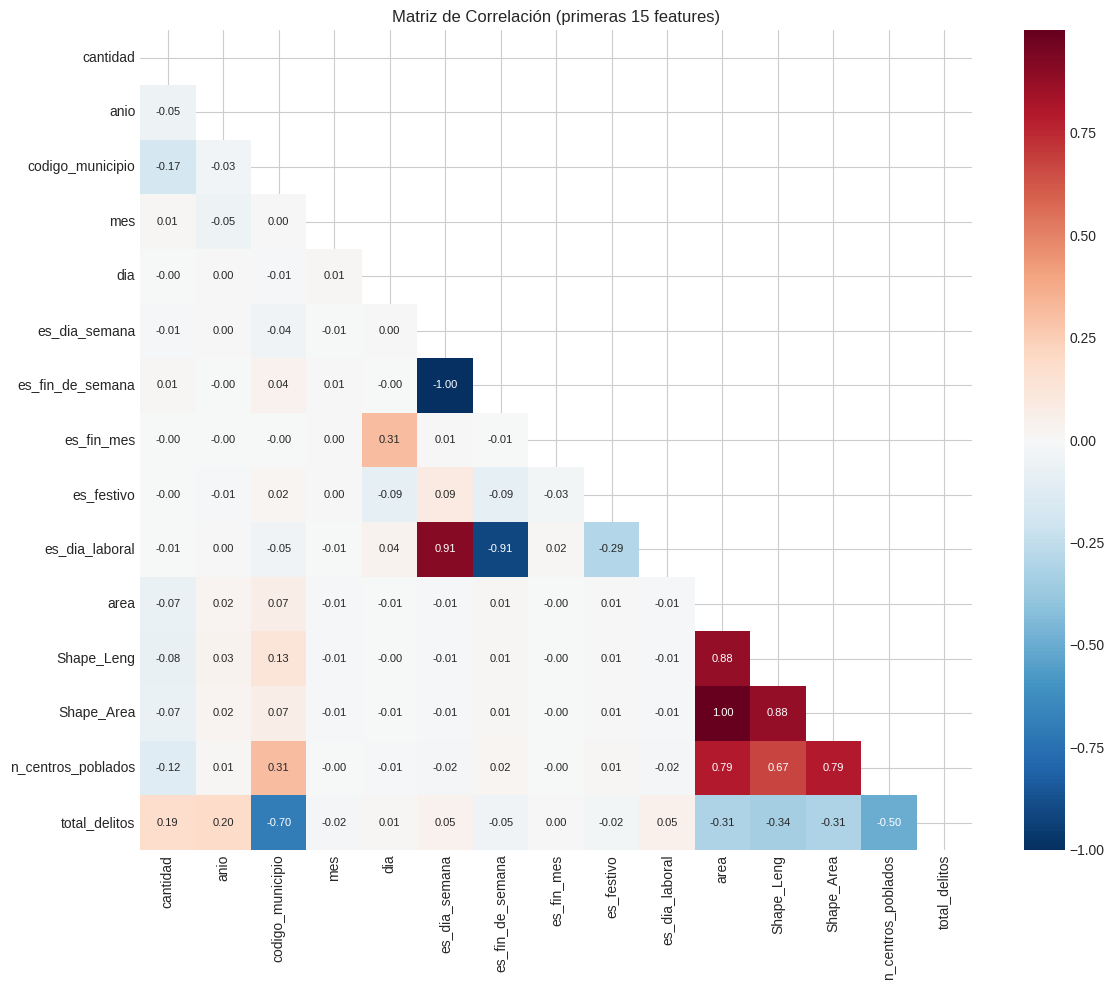

In [11]:
# Matriz de correlación (solo primeras 15 columnas numéricas para legibilidad)
cols_for_corr = numeric_cols[:15]

fig, ax = plt.subplots(figsize=(12, 10))
corr_matrix = df[cols_for_corr].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, ax=ax, annot_kws={'size': 8})
ax.set_title('Matriz de Correlación (primeras 15 features)')
plt.tight_layout()
plt.show()

## 5. Conclusiones y Recomendaciones

In [13]:
print("=" * 60)
print("CONCLUSIONES")
print("=" * 60)

def evaluar_balance(counts, nombre):
    ratio = counts.max() / counts.min()
    n_raras = (counts < counts.sum() * 0.01).sum()  # <1% del total
    
    if ratio > 50 or n_raras > len(counts) * 0.5:
        status = "⚠️ MUY DESBALANCEADO"
        recomendacion = "SMOTE/ADASYN o agrupar clases minoritarias"
    elif ratio > 10:
        status = "⚡ DESBALANCEADO"
        recomendacion = "class_weight='balanced' o undersampling"
    elif ratio > 3:
        status = "⚡ MODERADO"
        recomendacion = "class_weight='balanced'"
    else:
        status = "✅ BALANCEADO"
        recomendacion = "No requiere balanceo"
    
    print(f"\n{nombre}:")
    print(f"  Categorías: {len(counts)}")
    print(f"  Ratio max/min: {ratio:.2f}")
    print(f"  Status: {status}")
    print(f"  Recomendación: {recomendacion}")

evaluar_balance(delito_counts, "delito")
evaluar_balance(arma_counts, "armas_medios")
evaluar_balance(perfil_counts, "perfil")


CONCLUSIONES

delito:
  Categorías: 8
  Ratio max/min: 95.06
  Status: ⚠️ MUY DESBALANCEADO
  Recomendación: SMOTE/ADASYN o agrupar clases minoritarias

armas_medios:
  Categorías: 48
  Ratio max/min: 108771.00
  Status: ⚠️ MUY DESBALANCEADO
  Recomendación: SMOTE/ADASYN o agrupar clases minoritarias

perfil:
  Categorías: 9
  Ratio max/min: 163424.00
  Status: ⚠️ MUY DESBALANCEADO
  Recomendación: SMOTE/ADASYN o agrupar clases minoritarias
